# MIIA4101- Herramientas Computacionales para Análisis de Datos

## Ruteo con Tiempos Estocásticos (Competencia MOPTA 2018)

MOPTA es una competencia global de modelamiento matemático y optimización que se lleva a cabo en la Universidad de Lehigh anualmente. En 2018, nuestro Departamento participó con el ánimo de defender el título obtenido en 2017, enfrentándose a un reto que no se había planteado en versiones anteriores del concurso: ¡estocasticidad!.

<img src="files/logo.png" width=500x>
<img src="files/VRPrain.png" width=500x>

Un empresa desea una herramienta que le permita hacer su planeación diaría de distribución de productos perecederos, en un contexto en el que las condiciones climáticas parecen afectar los tiempos de desplazamiento en la región. El esquema de solución propuesto consiste en:
* **Un análisis de datos históricos para entender el comportamiento de los tiempos de viaje y su dependencia con el clima**
* Un ensamble de modelos de optimización que permita una solución en tiempo quasi-real considerando la dificultad que implican los problemas de ruteo, y la incertidumbre asociada a la estocasticidad.
* Un procedimiento de simulación para evaluar (y ajustar) el desempeño de la solución propuesta ante escenarios de variabilidad.

<img src="files/mopta_strat1.png" width=700x>

Nos concentraremos en el primer ítem, utilizando los datos provistos por la organización del concurso.

**Notas:**
- A continuación se muestra una exploración dentro del contexto del curso, que no necesariamente coincide con la solución planteada para el concurso
- Se obtuvo el primer lugar en dicha competencia.


In [69]:
import pandas as pd

T = pd.read_csv("MOPTA_data/tiempos.csv")
T.head(40)

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min]
0,97.5,35.76,2.71,0,1,10.60
1,97.5,35.76,2.71,0,2,32.08
2,97.5,35.76,2.71,0,3,6.95
3,97.5,35.76,2.71,0,5,27.64
4,97.5,35.76,2.71,0,7,24.13
5,97.5,35.76,2.71,0,8,18.42
6,97.5,35.76,2.71,0,9,21.20
7,97.5,35.76,2.71,0,10,19.00
8,97.5,35.76,2.71,1,2,20.32
9,97.5,35.76,2.71,1,3,14.00


**Primera impresión:**<br>
En las filas 0 a 30 se muestran parejas (i,j) diferentes, es decir, diferentes origen-destino de trayectos; a partir de 31 se repite la serie. De paso, sabemos ahora que se tienen nodos, o lugares diferentes, nombrados de 0 a 10. Por convención, se entiende que el 0 es el centro distribución, y del 1 al 10 se tienen clientes.

De lo anterior, *suponiendo* que la tabla es consistente, cada bloque de 31 filas corresponde a una observación de tiempos en trayectos que se pueden recorrer en la distribución (i.e., estamos analizando una red con 11 nodos y 31 arcos). Note, por ejemplo, que no existe conexión directa entre el centro de distribución y los clientes 4 y 6, así que para visitarlos es necesario pasar a través de otro nodo cliente.



In [70]:
from math import floor
print(T.shape)
T["Obs"] = [floor(i/31) for i in range(T.shape[0])]
T["Obs"]

(31000, 6)


0          0
1          0
2          0
3          0
4          0
        ... 
30995    999
30996    999
30997    999
30998    999
30999    999
Name: Obs, Length: 31000, dtype: int64

In [71]:
# también podría automatizarse viendo la cantidad de elementos unique

#T.iloc[28:34,:]
T.iloc[59:65,:]
#T.iloc[90:96,:]

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min],Obs
59,90.5,27.67,2.55,7,8,17.99,1
60,90.5,27.67,2.55,7,10,10.97,1
61,90.5,27.67,2.55,8,10,8.26,1
62,59.6,31.41,0.48,0,1,8.59,2
63,59.6,31.41,0.48,0,2,22.12,2
64,59.6,31.41,0.48,0,3,4.49,2


En efecto, tenemos bloques de observaciones para todos los arcos.

# ¿Cómo se relacionan las variables climáticas entre sí?

Uno esperaría correlación, pero es bueno evaluar, porque de entrada uno pensaría que algo posible es usar estas tres como variables independientes para estimar tiempos.

In [72]:
import matplotlib.pyplot as plt
import seaborn as sb

T_sin_arcos = T.drop(["i","j","duration[min]"], axis=1)
T_sin_arcos.head()

,temperature[F],precipitation[cm/hour],wind[km/hour],Obs
0,97.5,35.76,2.71,0
1,97.5,35.76,2.71,0
2,97.5,35.76,2.71,0
3,97.5,35.76,2.71,0
4,97.5,35.76,2.71,0


In [111]:
T_sin_arcos = T_sin_arcos.groupby(["Obs"]).max() # o min, o mean; SON IGUALES
T_sin_arcos.head(40)

,temperature[F],precipitation[cm/hour],wind[km/hour]
Obs,,,
0,97.5,35.76,2.71
1,90.5,27.67,2.55
2,59.6,31.41,0.48
3,21.3,6.48,0.85
4,17.9,15.34,1.63
5,46.1,52.67,2.64
6,93.6,6.87,0.39
7,87.6,57.68,4.80
8,27.2,48.94,4.15


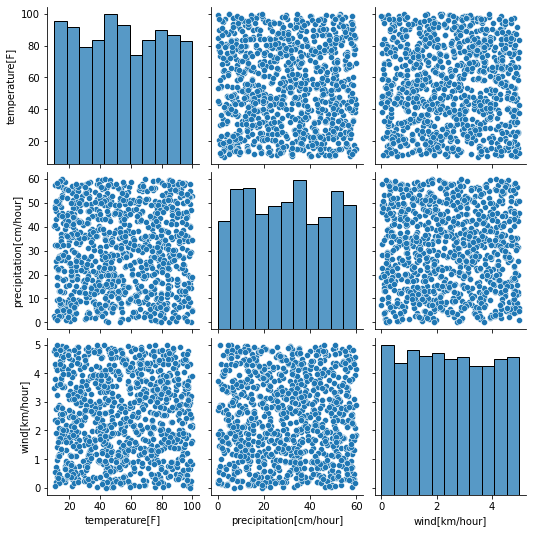

In [74]:
sb.pairplot(T_sin_arcos)
plt.show()

In [75]:
T_sin_arcos.corr()

,temperature[F],precipitation[cm/hour],wind[km/hour]
temperature[F],1.000000,0.026779,0.011832
precipitation[cm/hour],0.026779,1.000000,-0.027449
wind[km/hour],0.011832,-0.027449,1.000000


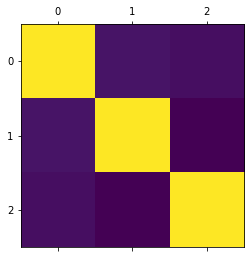

In [76]:
plt.matshow(T_sin_arcos.corr())
plt.show()

# ¿Cómo se relaciona un tiempo con cada variable climática?

In [77]:
T_un_arco = T.set_index(["Obs","i","j"])
T_un_arco.head(40)

temperature[F]  precipitation[cm/hour]  wind[km/hour]  duration[min]
Obs i j                                                                       
0   0 1             97.5                   35.76           2.71          10.60
      2             97.5                   35.76           2.71          32.08
      3             97.5                   35.76           2.71           6.95
      5             97.5                   35.76           2.71          27.64
      7             97.5                   35.76           2.71          24.13
      8             97.5                   35.76           2.71          18.42
      9             97.5                   35.76           2.71          21.20
      10            97.5                   35.76           2.71          19.00
    1 2             97.5                   35.76           2.71          20.32
      3             97.5                   35.76           2.71          14.00
      5             97.5                   35.76           2.71          22.00
      7             97.5                   35.76           2.71          27.13
      8             97.5                   35.76           2.71          26.25
      9             97.5                   35.76           2.71           6.70
      10            97.5                   35.76           2.71          24.79
    2 7             97.5                   35.76           2.71          20.19
      9             97.5                   35.76           2.71          16.35
      10            97.5                   35.76           2.71          30.55
    3 5             97.5                   35.76           2.71          22.36
      6             97.5                   35.76           2.71          30.38
      8             97.5                   35.76           2.71          18.98
      9             97.5                   35.76           2.71          16.15
      10            97.5                   35.76           2.71          27.65
    4 7             97.5                   35.76           2.71          18.97
      8             97.5                   35.76           2.71          18.34
      10            97.5                   35.76           2.71          12.12
    5 6             97.5                   35.76           2.71          21.61
      9             97.5                   35.76           2.71          25.90
    7 8             97.5                   35.76           2.71          19.92
      10            97.5                   35.76           2.71          10.48
    8 10            97.5                   35.76           2.71           8.01
1   0 1             90.5                   27.67           2.55           9.98
      2             90.5                   27.67           2.55          25.02
      3             90.5                   27.67           2.55           6.46
      5             90.5                   27.67           2.55          24.40
      7             90.5                   27.67           2.55          22.75
      8             90.5                   27.67           2.55          16.78
      9             90.5                   27.67           2.55          17.17
      10            90.5                   27.67           2.55          18.80
    1 2             90.5                   27.67           2.55          20.23

In [78]:
# OJO: "Slicing" sobre DataFrames con MultiIndex
T_un_arco = T_un_arco.loc[(slice(None), 8, 10),:]
T_un_arco.head(8)

,,,temperature[F],precipitation[cm/hour],wind[km/hour],duration[min]
Obs,i,j,,,,
0,8,10,97.5,35.76,2.71,8.01
1,8,10,90.5,27.67,2.55,8.26
2,8,10,59.6,31.41,0.48,5.58
3,8,10,21.3,6.48,0.85,6.80
4,8,10,17.9,15.34,1.63,8.07
5,8,10,46.1,52.67,2.64,10.22
6,8,10,93.6,6.87,0.39,4.97
7,8,10,87.6,57.68,4.80,12.04


In [79]:
# forma alternativa

otro_T_un_arco = T[ (T["i"]==8) & (T["j"]==10) ]
otro_T_un_arco.head()

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min],Obs
30,97.5,35.76,2.71,8,10,8.01,0
61,90.5,27.67,2.55,8,10,8.26,1
92,59.6,31.41,0.48,8,10,5.58,2
123,21.3,6.48,0.85,8,10,6.80,3
154,17.9,15.34,1.63,8,10,8.07,4


In [80]:
otro_T_un_arco.set_index(["Obs"], inplace=True)
otro_T_un_arco.head()

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min]
Obs,,,,,,
0,97.5,35.76,2.71,8,10,8.01
1,90.5,27.67,2.55,8,10,8.26
2,59.6,31.41,0.48,8,10,5.58
3,21.3,6.48,0.85,8,10,6.80
4,17.9,15.34,1.63,8,10,8.07


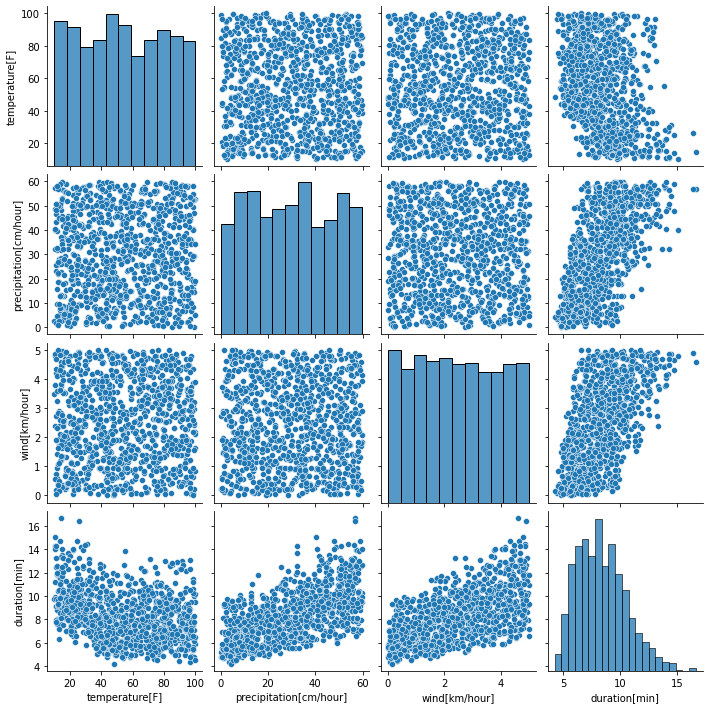

In [81]:
sb.pairplot(T_un_arco)
plt.show()

### Componentes principales

In [82]:
from sklearn.decomposition import PCA

X = T_un_arco.values
pca = PCA(n_components=2)
pca.fit(X)
print("Varianza explicada:")
print(pca.explained_variance_ratio_)

Varianza explicada:
[0.69219825 0.30326345]


# ¿Puedo ajustar una distribución para los tiempos de cada arco? (sin clima)

De pronto, en lugar de lo anterior, podría tener una distribución muy bien ajustada para el tiempo de cada arco. Así podría caracterizar la incertidumbre, y generar valores de los tiempos.

### Inspección visual


C:\Users\ch.gomez171\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


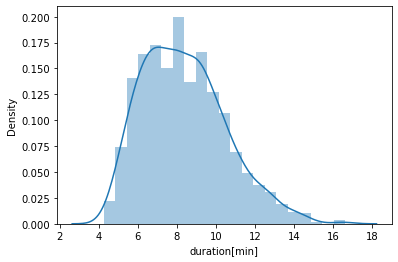

In [83]:
sb.distplot(T_un_arco["duration[min]"])
plt.show()

### Ajustar a distribución teórica

In [84]:
from scipy.stats import lognorm, kstest

param = lognorm.fit( T_un_arco["duration[min]"] )
print("\nParametros ajustados: "+str(param))


Parametros ajustados: (0.281211293737255, 0.7698162157940636, 7.304013760837382)


In [85]:
# Aplicar el test de Kolmogorov-Smirnov

D, p = kstest( T_un_arco["duration[min]"], "lognorm", args=param)
print("\nKolmogorov-Smirnov (D-stat, p-value): "+str((D, p)))


Kolmogorov-Smirnov (D-stat, p-value): (0.03619320126843617, 0.1420720626639541)


C:\Users\ch.gomez171\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([ 4.24      ,  4.26482966,  4.28965932,  4.31448898,  4.33931864,
        4.3641483 ,  4.38897796,  4.41380762,  4.43863727,  4.46346693,
        4.48829659,  4.51312625,  4.53795591,  4.56278557,  4.58761523,
        4.61244489,  4.63727455,  4.66210421,  4.68693387,  4.71176353,
        4.73659319,  4.76142285,  4.78625251,  4.81108216,  4.83591182,
        4.86074148,  4.88557114,  4.9104008 ,  4.93523046,  4.96006012,
        4.98488978,  5.00971944,  5.0345491 ,  5.05937876,  5.08420842,
        5.10903808,  5.13386774,  5.15869739,  5.18352705,  5.20835671,
        5.23318637,  5.25801603,  5.28284569,  5.30767535,  5.33250501,
        5.35733467,  5.38216433,  5.40699399,  5.43182365,  5.45665331,
        5.48148297,  5.50631263,  5.53114228,  5.55597194,  5.5808016 ,
        5.60563126,  5.63046092,  5.65529058,  5.68012024,  5.7049499 ,
        5.72977956,  5.75460922,  5.77943888,  5.80426854,  5.8290982 ,
        5.85392786,  5.87875752,  5.90358717,  5.92841683,  5.95

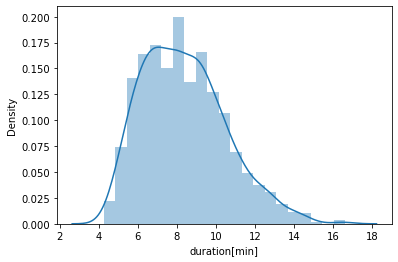

In [86]:
sb.distplot(T_un_arco["duration[min]"])

import numpy as np

x = np.linspace(T_un_arco["duration[min]"].min() , T_un_arco["duration[min]"].max(), 500)
x

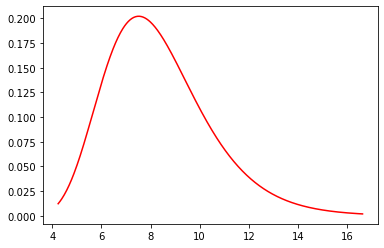

In [87]:
plt.figure()
y_pdf = lognorm.pdf(x, *param)
plt.plot(x, y_pdf, color='r')
plt.show()

### Ajuste para todos los arcos

In [88]:
O, D  = list( T["i"].values )[:31], list( T["j"].values )[:31]
arcos = [(O[k], D[k]) for k in range(len(O))]

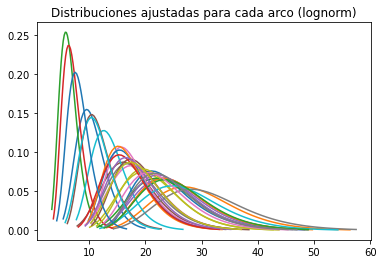

In [89]:
for a1,a2 in arcos:
    T_aesimo_arco = T.set_index(["Obs","i","j"])
    T_aesimo_arco = T_aesimo_arco.loc[(slice(None), int(a1), int(a2)),:]
    param = lognorm.fit( T_aesimo_arco["duration[min]"] )
    x = np.linspace(T_aesimo_arco["duration[min]"].min() , T_aesimo_arco["duration[min]"].max(), 50)
    y_pdf = lognorm.pdf(x, *param)
    plt.plot(x, y_pdf)
plt.title("Distribuciones ajustadas para cada arco (lognorm)")
plt.show()

Ok, pero: el sentido del problema va más a ver la incidencia del clima en los tiempos de viaje.


# ¿Correlaciones entre tiempos?

Si resulta ser cierto que el clima influye en los tiempos de viaje, es de esperarse que haya correlación entre los tiempos de viaje. Dado que, para **UN** clima, genero todos los tiempos.

In [90]:
Dur_oij = T.copy()
Dur_oij["(i,j)"] = Dur_oij["i"].astype(str) +","+ Dur_oij["j"].astype(str)
Dur_oij.head()

,temperature[F],precipitation[cm/hour],wind[km/hour],i,j,duration[min],Obs,"(i,j)"
0,97.5,35.76,2.71,0,1,10.60,0,"0,1"
1,97.5,35.76,2.71,0,2,32.08,0,"0,2"
2,97.5,35.76,2.71,0,3,6.95,0,"0,3"
3,97.5,35.76,2.71,0,5,27.64,0,"0,5"
4,97.5,35.76,2.71,0,7,24.13,0,"0,7"


In [91]:
Dur_oij.set_index(["Obs", "(i,j)"], inplace=True)
Dur_oij = Dur_oij["duration[min]"]
# i.e., Dur_oij.drop(["i", "j",...], axis=1, inplace=True)

Dur_oij.head()

Obs  (i,j)
0    0,1      10.60
     0,2      32.08
     0,3       6.95
     0,5      27.64
     0,7      24.13
Name: duration[min], dtype: float64

In [92]:
Dur_oij = Dur_oij.unstack()
Dur_oij.head(8)

"(i,j)","0,1","0,10","0,2","0,3","0,5","0,7","0,8","0,9","1,10","1,2",...,"3,8","3,9","4,10","4,7","4,8","5,6","5,9","7,10","7,8","8,10"
Obs,,,,,,,,,,,,,,,,,,,,,
0,10.60,19.00,32.08,6.95,27.64,24.13,18.42,21.20,24.79,20.32,...,18.98,16.15,12.12,18.97,18.34,21.61,25.90,10.48,19.92,8.01
1,9.98,18.80,25.02,6.46,24.40,22.75,16.78,17.17,21.62,20.23,...,15.37,15.19,11.83,16.26,15.55,21.26,22.55,10.97,17.99,8.26
2,8.59,11.01,22.12,4.49,18.45,21.14,13.26,13.40,19.72,17.86,...,12.67,12.93,8.39,12.72,13.51,16.49,18.33,7.67,14.62,5.58
3,8.25,16.60,24.56,5.98,20.86,22.32,13.14,14.76,19.15,16.61,...,16.57,16.19,9.68,13.23,16.15,18.83,22.16,9.23,15.16,6.80
4,10.20,21.59,27.00,5.88,23.44,27.08,15.69,18.47,22.79,22.75,...,16.45,18.12,11.68,15.33,18.58,21.37,24.66,11.98,17.65,8.07
5,13.93,21.69,38.94,7.57,30.85,30.75,19.15,23.61,27.70,28.03,...,18.53,18.25,13.18,21.15,22.24,25.09,29.33,12.18,22.53,10.22
6,6.12,12.11,18.37,3.56,16.29,14.26,10.19,10.12,15.11,12.65,...,11.08,11.94,7.26,9.59,10.66,15.14,15.13,6.50,11.48,4.97
7,15.59,27.16,48.11,10.75,36.54,35.38,29.83,28.72,40.27,30.56,...,26.95,26.74,19.17,27.06,27.28,37.30,37.33,18.81,27.60,12.04


In [93]:
Dur_oij.corr()

"(i,j)","0,1","0,10","0,2","0,3","0,5","0,7","0,8","0,9","1,10","1,2",...,"3,8","3,9","4,10","4,7","4,8","5,6","5,9","7,10","7,8","8,10"
"(i,j)",,,,,,,,,,,,,,,,,,,,,
"0,1",1.000000,0.744571,0.937322,0.747591,0.784576,0.947772,0.839887,0.808027,0.915063,0.928789,...,0.784431,0.889649,0.788129,0.856656,0.870816,0.733058,0.904326,0.885591,0.839693,0.902430
"0,10",0.744571,1.000000,0.797593,0.937812,0.939875,0.776350,0.910555,0.917960,0.850791,0.842144,...,0.942470,0.887221,0.940350,0.911420,0.898706,0.943886,0.878458,0.901130,0.921260,0.880650
"0,2",0.937322,0.797593,1.000000,0.817488,0.844786,0.940835,0.896761,0.872607,0.938674,0.941641,...,0.839191,0.911563,0.842717,0.905054,0.913158,0.803197,0.922893,0.919215,0.892756,0.929343
"0,3",0.747591,0.937812,0.817488,1.000000,0.939365,0.782219,0.924447,0.933414,0.858841,0.846887,...,0.944370,0.869564,0.936360,0.923491,0.910025,0.941064,0.872494,0.899623,0.927671,0.888384
"0,5",0.784576,0.939875,0.844786,0.939365,1.000000,0.814242,0.931248,0.936966,0.885060,0.871601,...,0.943829,0.900137,0.941181,0.932370,0.922714,0.941291,0.897503,0.916260,0.940317,0.906847
"0,7",0.947772,0.776350,0.940835,0.782219,0.814242,1.000000,0.865285,0.833789,0.927601,0.942233,...,0.812061,0.906867,0.821916,0.879783,0.894101,0.767947,0.921556,0.908707,0.866006,0.919560
"0,8",0.839887,0.910555,0.896761,0.924447,0.931248,0.865285,1.000000,0.948644,0.917083,0.912298,...,0.924826,0.903326,0.927880,0.947706,0.937759,0.918473,0.911818,0.936697,0.945010,0.933953
"0,9",0.808027,0.917960,0.872607,0.933414,0.936966,0.833789,0.948644,1.000000,0.898662,0.887622,...,0.929314,0.888456,0.925716,0.941509,0.937164,0.923686,0.898356,0.922431,0.945070,0.918145
"1,10",0.915063,0.850791,0.938674,0.858841,0.885060,0.927601,0.917083,0.898662,1.000000,0.944048,...,0.883146,0.925767,0.886886,0.928370,0.925515,0.849798,0.932865,0.930679,0.920274,0.944855


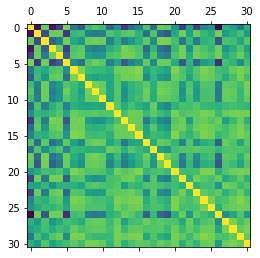

In [94]:
plt.matshow(Dur_oij.corr())
plt.show()

¡Por supuesto! Todos obedecen a un factor común: **el clima**.

# ¿Hay grupos en los datos? (Clustering)

Veamos cómo se distribuye la nube de puntos del clima, y si, quizá, existe alguna separación en bloque que puedan ser útiles. Luego habrá que ver si un eventual grupo corresponde a grupos también con respecto a tiempos.

### ¿Hay clusters en las muestras del clima?

In [95]:
#from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

x = T_un_arco.drop(["duration[min]"], axis=1)
x.head()

,,,temperature[F],precipitation[cm/hour],wind[km/hour]
Obs,i,j,,,
0,8,10,97.5,35.76,2.71
1,8,10,90.5,27.67,2.55
2,8,10,59.6,31.41,0.48
3,8,10,21.3,6.48,0.85
4,8,10,17.9,15.34,1.63


In [96]:
x.values

array([[97.5 , 35.76,  2.71],
       [90.5 , 27.67,  2.55],
       [59.6 , 31.41,  0.48],
       ...,
       [94.4 , 15.99,  4.04],
       [78.9 ,  6.26,  3.71],
       [96.5 , 53.68,  3.59]])

In [97]:
cluster = AgglomerativeClustering(n_clusters=7)
sol = cluster.fit_predict(x.values)
sol

array([4, 0, 3, 6, 6, 2, 0, 4, 1, 1, 1, 2, 1, 1, 3, 5, 5, 4, 1, 1, 3, 1,
       5, 3, 3, 1, 5, 1, 6, 2, 3, 5, 2, 5, 4, 2, 1, 0, 1, 0, 3, 3, 0, 5,
       1, 3, 4, 2, 3, 0, 1, 0, 6, 4, 1, 2, 5, 4, 0, 2, 4, 2, 0, 5, 2, 0,
       0, 1, 1, 5, 2, 1, 1, 4, 6, 2, 1, 3, 4, 0, 0, 0, 6, 1, 5, 2, 0, 2,
       0, 1, 4, 0, 6, 1, 3, 5, 5, 5, 1, 5, 5, 2, 0, 4, 2, 0, 3, 6, 0, 0,
       1, 0, 4, 4, 3, 5, 5, 3, 4, 6, 4, 4, 3, 5, 3, 5, 4, 2, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 5, 3, 0, 2, 0, 1, 5, 2, 1, 2, 2, 3, 3, 0, 5, 1, 2,
       5, 0, 3, 0, 0, 5, 0, 2, 1, 4, 4, 1, 5, 1, 4, 1, 1, 0, 2, 0, 6, 4,
       0, 1, 0, 1, 1, 3, 5, 4, 1, 2, 1, 0, 1, 1, 1, 0, 4, 0, 4, 5, 6, 3,
       0, 4, 0, 0, 4, 2, 2, 5, 3, 3, 1, 3, 2, 1, 2, 0, 2, 0, 3, 5, 4, 0,
       5, 5, 3, 3, 0, 3, 4, 2, 4, 3, 1, 5, 0, 4, 2, 0, 2, 0, 5, 1, 6, 6,
       3, 1, 3, 2, 3, 3, 0, 5, 6, 0, 1, 0, 0, 5, 5, 0, 2, 3, 3, 5, 0, 4,
       3, 2, 0, 3, 1, 0, 1, 0, 6, 2, 0, 0, 5, 1, 5, 0, 0, 5, 0, 5, 0, 3,
       1, 4, 4, 3, 3, 6, 4, 0, 1, 3, 3, 2, 3, 3, 4,

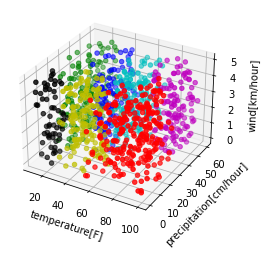

In [98]:
col = ['r','g','b','c','m','y','k']
cols = [col[s] for s in sol]

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x.iloc[:,0], x.iloc[:,1], x.iloc[:,2], c=cols)
ax.set_xlabel(x.columns[0])
ax.set_ylabel(x.columns[1])
ax.set_zlabel(x.columns[2])
plt.show()

# ¿Corresponden las observaciones a una serie de tiempo? ¿Pronosticar?

En la práctica, dicen que la empresa obtiene los datos del clima, y con ellos conocidos se hace la planeación. Sin embargo, uno podría tratar de predecir, ya sea el clima o los tiempos. ¿Por qué? Si tengo un estimado razonable el día anterior, puedo correr la optimización durante la noche; si espero el dato del día a planear, debo correr la optimización en un lapso de minutos.

### Todos los arcos

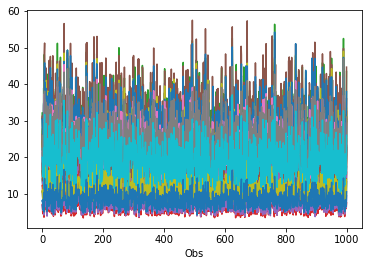

In [99]:
Dur_oij.plot(legend=False)
plt.show()

### Un arco individual

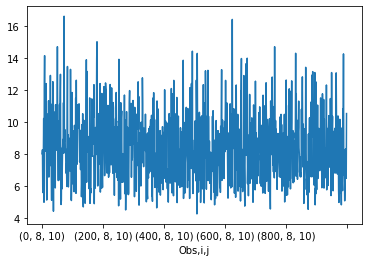

In [100]:
T_un_arco["duration[min]"].plot()
plt.show()

Nada contundente. No vemos alguna tendencia, alguna estacionalidad. Volatilidad casi que de ruido.

# ¿Incidencia de clima en tiempos de viaje (por variable)?

¿Será que alguna variable climática incide en los tiempos? ¿Será que TODAS inciden? ¿Qué tan bien puedo estimar tiempos a partir del clima?

### Estimación con regresión de a una variable

In [101]:
import statsmodels.api as sm
#from scipy import stats

#T_un_arco.drop(["Aumentó?"], axis=1, inplace=True)
T_un_arco.columns

Index(['temperature[F]', 'precipitation[cm/hour]', 'wind[km/hour]',
       'duration[min]'],
      dtype='object')

In [102]:
for i in T_un_arco.columns:
    if i != "duration[min]":
        print("\n\n"+str(i))
        y = T_un_arco["duration[min]"].values
        x = T_un_arco[i].values
        X = sm.add_constant(x)

        mod = sm.OLS(y, X)
        mod = mod.fit()
        print(mod.summary())



temperature[F]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.18e-23
Time:                        17:52:41   Log-Likelihood:                -2128.0
No. Observations:                1000   AIC:                             4260.
Df Residuals:                     998   BIC:                             4270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7503      0.149   

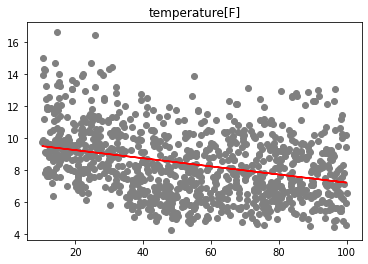

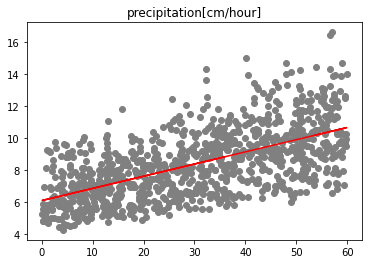

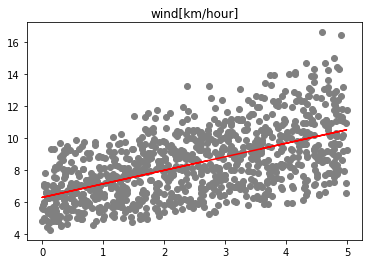

In [103]:
for i in T_un_arco.columns:
    if i != "duration[min]":
        y = T_un_arco["duration[min]"].values
        x = T_un_arco[i].values
        X = sm.add_constant(x)    
        mod = sm.OLS(y, X)
        mod = mod.fit()

        plt.figure()
        ypred = mod.predict(X)
        plt.plot(x, y, 'o', color='grey')
        plt.plot(x, ypred, '-', color='r')
        plt.title(i)
        plt.show()

### Estimación con regresión de a dos variables

In [104]:
for i in T_un_arco.columns:
    if i != "duration[min]":
        y = T_un_arco["duration[min]"]
        x = T_un_arco.drop([i, "duration[min]"], axis=1)
        X = sm.add_constant(x)
        mod = sm.OLS(y, X)
        mod = mod.fit()
        print("\n\n")
        print(mod.summary())




                            OLS Regression Results                            
Dep. Variable:          duration[min]   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1322.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):          3.46e-281
Time:                        17:52:42   Log-Likelihood:                -1530.7
No. Observations:                1000   AIC:                             3067.
Df Residuals:                     997   BIC:                             3082.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    

### Estimación mediante regresión múltiple (scipy.stats)

In [105]:
y = T_un_arco["duration[min]"]
x = T_un_arco.copy()
x.drop(["duration[min]"], axis=1, inplace=True)

X = sm.add_constant(x)
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          duration[min]   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1711.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:52:42   Log-Likelihood:                -1269.8
No. Observations:                1000   AIC:                             2548.
Df Residuals:                     996   BIC:                             2567.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.3104      0.091     58.125      0.000       5.131       5.490
temperature[F]            -0.0275      0.001    -26.122      0.000      -0.030      -0.025
precipitation[cm/hour]     0.0796      0.002     50.013      0.000       0.076       0.083
wind[km/hour]              0.8805      0.019     46.598      0.000       0.843       0.918
==============================================================================
Omnibus:                        2.656   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.700
Skew:                           0.124   Prob(JB):                        0.259
Kurtosis:                       2.944   Cond. No.                         225.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimación mediante regresión (scikit learn)

In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = T_un_arco["duration[min]"]
x = T_un_arco.copy()
x.drop(["duration[min]"], axis=1, inplace=True)

modelo = linear_model.LinearRegression()
modelo.fit( x.values, y.values )
y_pred = modelo.predict( x.values )

print('Coefficients: \t\t'+str(modelo.intercept_)+"\t"+str(modelo.coef_) )
print("Mean squared error: \t%.2f"% mean_squared_error(y, y_pred))
print('Variance score: \t%.2f' % r2_score(y, y_pred))

Coefficients: 		5.310410570111271	[-0.0274532   0.07958466  0.88049435]
Mean squared error: 	0.74
Variance score: 	0.84


### Estimación mediante aprendizaje (Support Vector Regression)

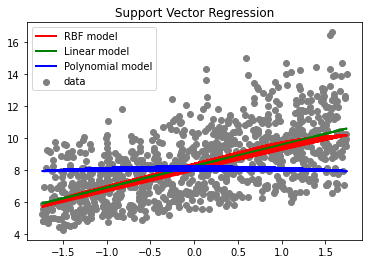

In [107]:
from sklearn.svm import SVR
from sklearn import preprocessing, svm, model_selection

y = T_un_arco["duration[min]"].values
X = T_un_arco["precipitation[cm/hour]"].values
X = preprocessing.scale(X.reshape(1000,1))

# Intentemos tres modelos
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# PRedicciones de cada uno
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Visualizar resultados
plt.scatter(X, y, color='grey', label='data')
plt.plot(X, y_rbf, color='r', lw=2, label='RBF model')
plt.plot(X, y_lin, color='g', lw=2, label='Linear model')
plt.plot(X, y_poly, color='b', lw=2, label='Polynomial model')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## ¿Qué climas aumentan tiempo medio (y cuáles no)?

In [108]:
T_un_arco["Aumentó?"] = T_un_arco["duration[min]"] > T_un_arco["duration[min]"].mean()
T_un_arco.head()

,,,temperature[F],precipitation[cm/hour],wind[km/hour],duration[min],Aumentó?
Obs,i,j,,,,,
0,8,10,97.5,35.76,2.71,8.01,False
1,8,10,90.5,27.67,2.55,8.26,False
2,8,10,59.6,31.41,0.48,5.58,False
3,8,10,21.3,6.48,0.85,6.80,False
4,8,10,17.9,15.34,1.63,8.07,False


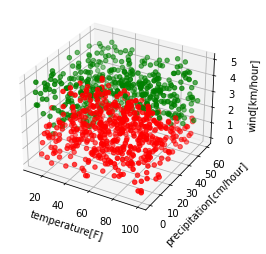

In [109]:
colz = [col[s] for s in T_un_arco.iloc[:,4].astype(int)]
# ver? int

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(T_un_arco.iloc[:,0],T_un_arco.iloc[:,1],T_un_arco.iloc[:,2], c=colz)
ax.set_xlabel(T_un_arco.columns[0])
ax.set_ylabel(T_un_arco.columns[1])
ax.set_zlabel(T_un_arco.columns[2])
plt.show()

In [110]:
X = T_un_arco.iloc[:,[0,1,2]]
X = preprocessing.scale(X)
y = T_un_arco.iloc[:,4]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.2)

learner = svm.SVC(kernel="linear")
learner.fit(X_train, y_train)
print("Test error: "+str(learner.score(X_test,y_test))+"\n")

Test error: 0.875

